# Pymaceuticals Inc.
---

### Analysis

- The data provides information on different drug regimens and their effects on tumor volume in mice. By comparing the mean, median, variance, standard deviation, and standard error of each drug regimen, we can observe differences in their efficacy. For example, Capomulin and Ramicane have lower mean and median tumor volumes compared to other drugs like Ketapril, Naftisol, and Placebo. This suggests that Capomulin and Ramicane might be more effective in reducing tumor size.

- The data includes information about potential outliers in tumor volume for each drug regimen. By identifying potential outliers, we can understand the variability in response to treatment. For instance, Infubinol has one potential outlier with a tumor volume of 36.321346. This finding suggests that Infubinol may not consistently reduce tumor volume as expected.

- The data includes individual measurements for mice, such as their ID, timepoint, tumor volume, metastatic sites, drug regimen, sex, age, and weight. This allows for more detailed analysis at the mouse level. Researchers can analyze specific mice and their response to different drug regimens. For example, mouse a411 treated with Ramicane showed a significant reduction in tumor volume (38.407618), indicating the potential effectiveness of Ramicane in that particular case.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data =pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
print(combined_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22  


In [4]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print("Number of mice:", num_mice)

Number of mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
print("Duplicate mice IDs:", duplicate_mice_ids)

Duplicate mice IDs: ['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == duplicate_mice_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID"], keep="first")
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print("Number of mice in the clean DataFrame:", num_mice_clean)

Number of mice in the clean DataFrame: 249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([("Mean Tumor Volume", "mean"),
                                                                                 ("Median Tumor Volume", "median"),
                                                                                 ("Tumor Volume Variance", "var"),
                                                                                 ("Tumor Volume Std. Dev.", "std"),
                                                                                 ("Tumor Volume Std. Err.", "sem")])
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = combined_data.groupby("Drug Regimen").agg(
    Mean=("Tumor Volume (mm3)", "mean"),
    Median=("Tumor Volume (mm3)", "median"),
    Variance=("Tumor Volume (mm3)", "var"),
    Std_Dev=("Tumor Volume (mm3)", "std"),
    SEM=("Tumor Volume (mm3)", "sem")
)
# Set the column name
summary_stats.columns.name = "Tumor Volume (mm3)"
summary_stats 

Tumor Volume (mm3),Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

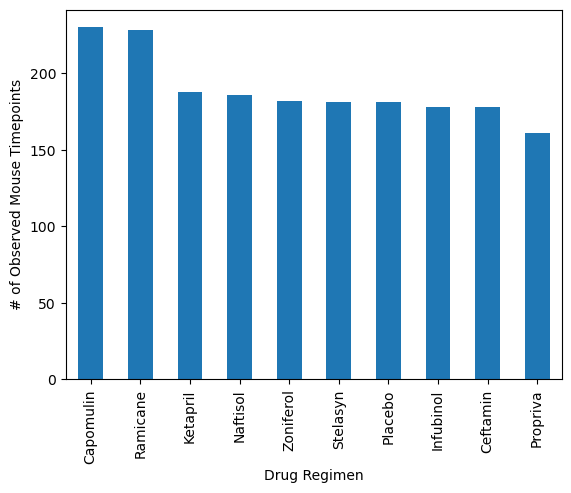

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = combined_data["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

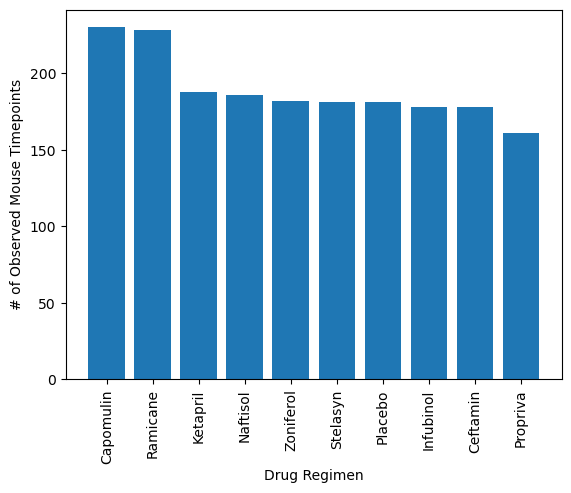

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = combined_data["Drug Regimen"].value_counts()
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()

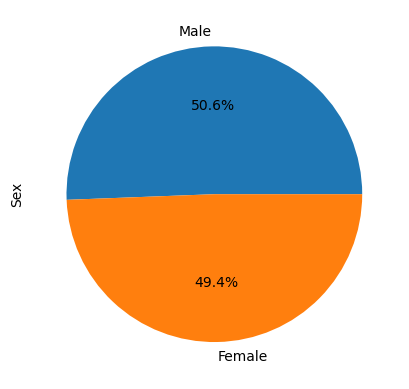

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = combined_data["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=360)

plt.show()

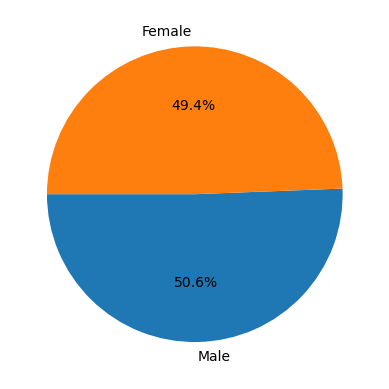

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = combined_data["Sex"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180)

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, combined_data, on=["Mouse ID", "Timepoint"], how="left")
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]


print(final_tumor_volume[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers using the upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


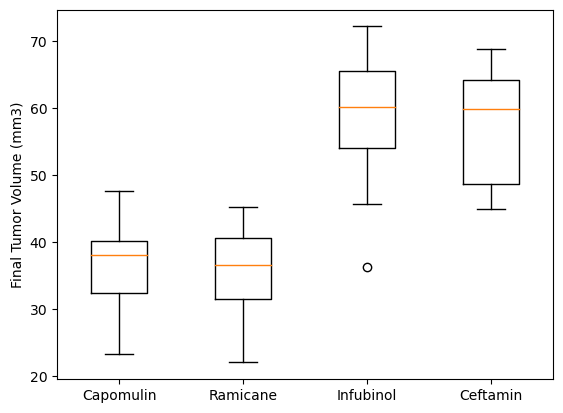

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] for treatment in treatments]
plt.boxplot(tumor_volume_data, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")

# Display the plot
plt.show()

## Line and Scatter Plots

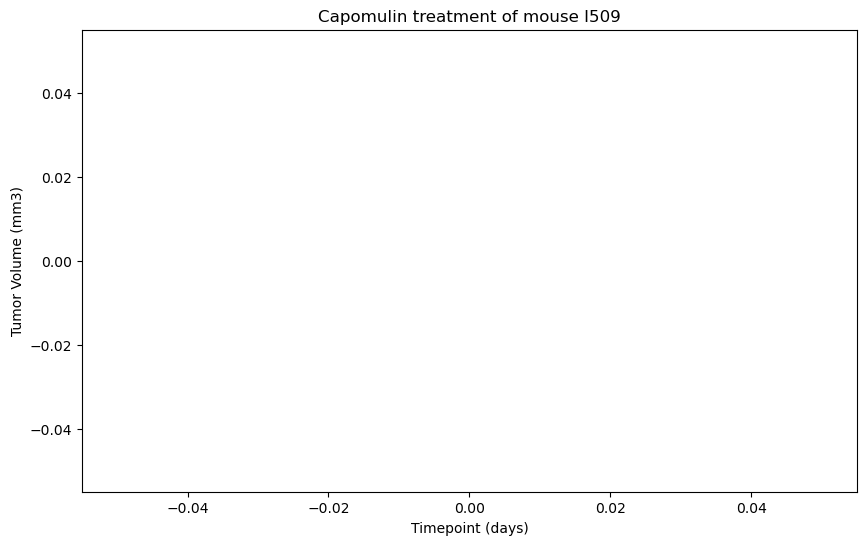

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_test = combined_data[combined_data["Mouse ID"] == "I509"]
capomulin_mouse_test = capomulin_mouse_test[capomulin_mouse_test["Drug Regimen"] == "Capomulin"]

plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_test["Timepoint"], capomulin_mouse_test["Tumor Volume (mm3)"], marker="o")


plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

In [26]:
# do not see data for Mouse ID I509- So chart is empty
mouse_data_i509 = combined_data[combined_data["Mouse ID"] == "I509"]

if mouse_data_i509.empty:
    print("No data available for Mouse ID I509")
else:
    print("Data available for Mouse ID I509")

No data available for Mouse ID I509


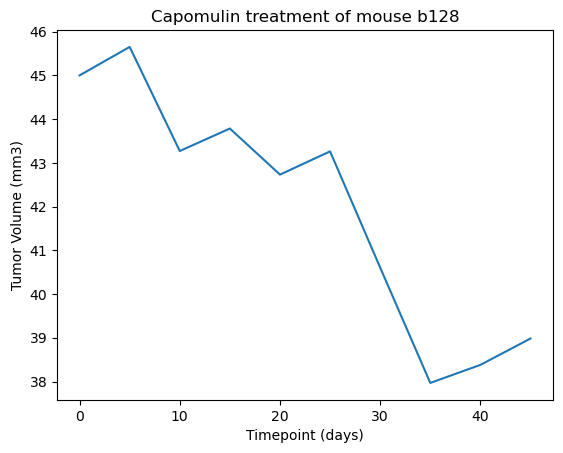

In [27]:
#Do have mouse ID B128 treated with capomulin

capomulin_mouse = combined_data[combined_data["Mouse ID"] == "b128"]
capomulin_mouse = capomulin_mouse[capomulin_mouse["Drug Regimen"] == "Capomulin"]

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])


plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

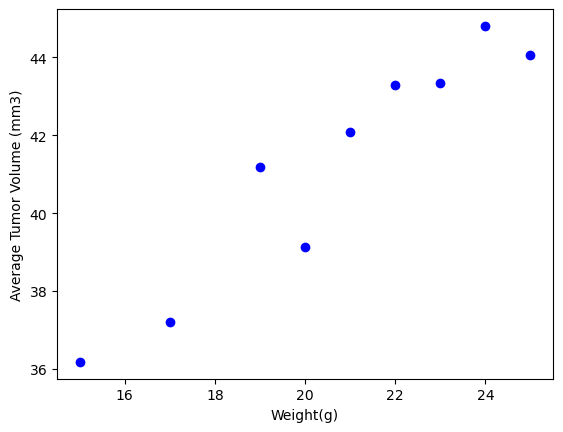

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
plt.scatter(avg_tumor_volume.index, avg_tumor_volume, marker="o", color="blue")


plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


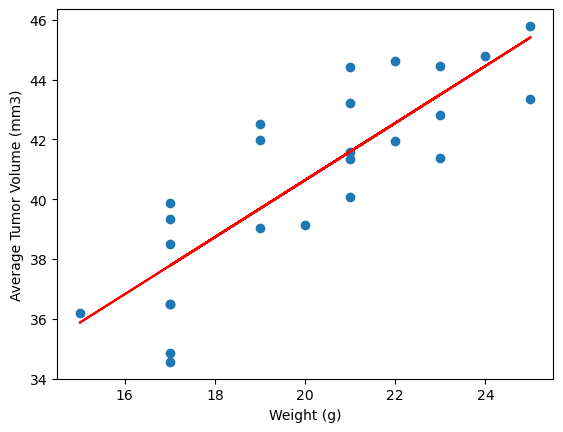

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen



In [ ]:
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

correlation = avg_tumor_volume.corr(mouse_weight)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)

regression_line = slope * mouse_weight + intercept

plt.scatter(mouse_weight, avg_tumor_volume, color="blue", label="Data Points")
plt.plot(mouse_weight, regression_line, color="red", label="Regression Line")

In [34]:
num_unique_mouse_weight = mouse_weight.nunique()
num_unique_mouse_volume = avg_tumor_volume.nunique()

print(f"Number of unique Mouse IDs in mouse_weight: {num_unique_mouse_weight}")
print(f"Number of unique Mouse IDs in avg_tumor_volume: {num_unique_mouse_volume}")

Number of unique Mouse IDs in mouse_weight: 9
Number of unique Mouse IDs in avg_tumor_volume: 9


In [31]:
missing_values_weight = mouse_weight.isnull().any()
missing_values_volume = avg_tumor_volume.isnull().any()

print(f"Are there any missing values in mouse_weight?: {missing_values_weight}")
print(f"Are there any missing values in avg_tumor_volume?: {missing_values_volume}")

Are there any missing values in mouse_weight?: False
Are there any missing values in avg_tumor_volume?: False
